In [8]:
import pandas as pd
import plotly.express as px
import seaborn as sns

# Carregar os dados de inadimplência
df = pd.read_json('../data/api_data.json')

In [7]:
df

,DATA_BASE,CLIENTE,ESTADO,SUB_REGIAO,MODALIDADE,CARTEIRA,VENCIDO_ACIMA_DE_15_DIAS
0,202409,PF,PR,80,Rural e Agroindustrial,60480.75,24655.54
1,202409,PF,PA,67,Cartão de Crédito,198497.95,145335.17
2,202409,PJ,PA,67,Cheque Especial e Conta Garantida,18677.63,8410.95
3,202409,PJ,NI,NI,Não Identificado,13360958.07,4313.40
4,202409,PF,SP,19,Veículos,127277.03,19780.90
...,...,...,...,...,...,...,...
3012,202409,PJ,SP,06,Financiamento de Infraestrutura/Desenvolviment...,3453667.04,5039.63
3013,202409,PJ,SP,06,Habitacional,135768.91,6647.16
3014,202409,PJ,SP,06,Comércio Exterior,1242048.36,0.00
3015,202409,PJ,SP,06,Habitacional,1009155.31,0.77


In [9]:
valores_totais = df[['CARTEIRA','VENCIDO_ACIMA_DE_15_DIAS']].sum()

inad_total = valores_totais['VENCIDO_ACIMA_DE_15_DIAS'] / valores_totais['CARTEIRA']

inad_total_metric = f'{inad_total:.2%}'

print(valores_totais)
print(inad_total)
print(inad_total_metric)

CARTEIRA                    6.162853e+09
VENCIDO_ACIMA_DE_15_DIAS    1.342846e+08
dtype: float64
0.021789361713842013
2.18%


In [ ]:
df_cliente = df.groupby('CLIENTE')[['CARTEIRA','VENCIDO_ACIMA_DE_15_DIAS']].sum()

df_cliente['INADIMPLENCIA'] = (df_cliente['VENCIDO_ACIMA_DE_15_DIAS'] / df_cliente['CARTEIRA']) * 100

df_cliente

,CARTEIRA,VENCIDO_ACIMA_DE_15_DIAS,INADIMPLENCIA
CLIENTE,,,
PF,3.855606e+09,1.062723e+08,2.756305
PJ,2.307247e+09,2.801236e+07,1.214103


In [22]:
df_filtered_uf = df.groupby('ESTADO')[['CARTEIRA','VENCIDO_ACIMA_DE_15_DIAS']].sum()

df_filtered_uf['INADIMPLENCIA'] = (df_filtered_uf['VENCIDO_ACIMA_DE_15_DIAS']/df_filtered_uf['CARTEIRA']) *100

df_filtered_uf

,CARTEIRA,VENCIDO_ACIMA_DE_15_DIAS,INADIMPLENCIA
ESTADO,,,
AC,1.667253e+07,389612.54,2.336853
AL,4.790320e+07,1484249.88,3.098436
AM,6.215234e+07,1566531.67,2.520471
AP,1.542042e+07,335451.37,2.175371
BA,2.312799e+08,7146046.86,3.089783
CE,1.327671e+08,3806368.56,2.866952
DF,1.528613e+08,2490070.35,1.628974
ES,1.020340e+08,1981863.57,1.942356
GO,2.858098e+08,7561906.22,2.645782


In [25]:
df_modalidade = df.groupby('MODALIDADE')[['CARTEIRA','VENCIDO_ACIMA_DE_15_DIAS']].sum()

df_modalidade['INADIMPLENCIA'] = (df_modalidade['VENCIDO_ACIMA_DE_15_DIAS']/df_modalidade['CARTEIRA']) *100

df_modalidade.sort_values('INADIMPLENCIA',ascending=False)

,CARTEIRA,VENCIDO_ACIMA_DE_15_DIAS,INADIMPLENCIA
MODALIDADE,,,
Cartão de Crédito,5.559194e+08,53717117.64,9.662753
Cheque Especial e Conta Garantida,5.609701e+07,3758553.84,6.700097
Outros Créditos,3.941988e+08,22792475.01,5.781974
Não Identificado,6.419737e+07,2947960.03,4.592026
Empréstimo sem Consignação em Folha,2.928877e+08,10615467.39,3.624415
Rural e Agroindustrial,6.819274e+08,12815689.48,1.879334
Veículos,3.281140e+08,5378868.34,1.639329
Capital de Giro,6.530209e+08,9744840.03,1.492271
Empréstimo com Consignação em Folha,6.545194e+08,5238711.30,0.800391


In [28]:
df_modalidade['INADIMPLENCIA'].max()

df_modalidade_max = df_modalidade[df_modalidade['INADIMPLENCIA'] == df_modalidade['INADIMPLENCIA'].max()]

df_modalidade_max


,CARTEIRA,VENCIDO_ACIMA_DE_15_DIAS,INADIMPLENCIA
MODALIDADE,,,
Cartão de Crédito,5.559194e+08,53717117.64,9.662753


In [6]:
df_modalidade = df.groupby('MODALIDADE',as_index=False)[['CARTEIRA','VENCIDO_ACIMA_DE_15_DIAS']].sum()
df_modalidade['INADIMPLENCIA'] = (df_modalidade['VENCIDO_ACIMA_DE_15_DIAS']/df_modalidade['CARTEIRA']) *100
df_modalidade.drop(columns=['VENCIDO_ACIMA_DE_15_DIAS','CARTEIRA']).sort_values('INADIMPLENCIA',ascending=False)

df_modalidade

,MODALIDADE,CARTEIRA,VENCIDO_ACIMA_DE_15_DIAS,INADIMPLENCIA
0,Capital de Giro,6.530209e+08,9744840.03,1.492271
1,Cartão de Crédito,5.559194e+08,53717117.64,9.662753
2,Cheque Especial e Conta Garantida,5.609701e+07,3758553.84,6.700097
3,Comércio Exterior,2.564494e+08,933247.47,0.363911
4,Empréstimo com Consignação em Folha,6.545194e+08,5238711.30,0.800391
5,Empréstimo sem Consignação em Folha,2.928877e+08,10615467.39,3.624415
6,Financiamento de Infraestrutura/Desenvolviment...,5.484296e+08,749461.90,0.136656
7,Habitacional,1.168632e+09,2133138.69,0.182533
8,Investimento,2.942684e+08,1798905.41,0.611315
9,Não Identificado,6.419737e+07,2947960.03,4.592026


In [21]:
fig = px.bar(data_frame=df_modalidade, x='MODALIDADE',y='INADIMPLENCIA')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [16]:
from utils import fetch_bcb_data

df = fetch_bcb_data()

In [4]:
df.head()

,DATA_BASE,CLIENTE,ESTADO,SUB_REGIAO,MODALIDADE,CARTEIRA,VENCIDO_ACIMA_DE_15_DIAS
0,202309,PJ,AL,57,Financiamento de Infraestrutura/Desenvolviment...,2632404.64,2324.08
1,202309,PJ,BA,46,Investimento,647148.49,1032.38
2,202309,PJ,MG,39,Cheque Especial e Conta Garantida,370614.22,1261.06
3,202309,PF,GO,74,Empréstimo com Consignação em Folha,6738904.56,9623.67
4,202309,PF,GO,75,Veículos,4591510.03,15214.63


In [9]:
df_grouped = df.groupby('DATA_BASE', as_index=False)[['CARTEIRA','VENCIDO_ACIMA_DE_15_DIAS']].sum()

df_grouped

,DATA_BASE,CARTEIRA,VENCIDO_ACIMA_DE_15_DIAS
0,202309,5.552757e+09,1.328006e+08
1,202310,5.582196e+09,1.353905e+08
2,202311,5.642814e+09,1.308949e+08
3,202312,5.729110e+09,1.243947e+08
4,202401,5.721779e+09,1.257257e+08
5,202402,5.749233e+09,1.250123e+08
6,202403,5.827192e+09,1.286484e+08
7,202404,5.849843e+09,1.359303e+08
8,202405,5.888368e+09,1.406648e+08
9,202406,5.974630e+09,1.380093e+08


<Axes: xlabel='DATA_BASE', ylabel='CARTEIRA'>

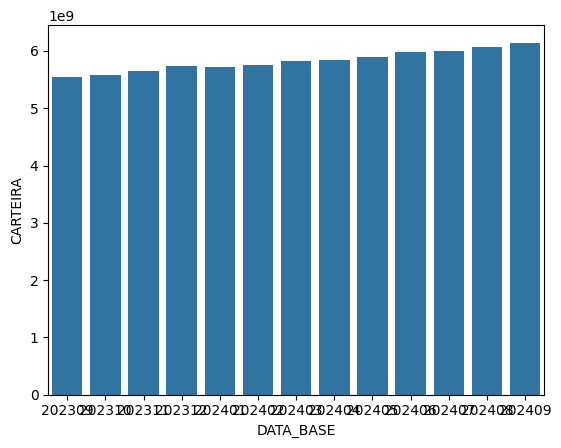

In [10]:
sns.barplot(df_grouped,x = 'DATA_BASE',y = 'CARTEIRA')

In [13]:
#INADIMPLENCIA POR ESTADO

df = df[df['DATA_BASE'] == '202309']

df_uf = df.groupby('ESTADO', as_index=False)[['VENCIDO_ACIMA_DE_15_DIAS','CARTEIRA']].sum()
df_uf['INADIMPLENCIA'] = (df_uf['VENCIDO_ACIMA_DE_15_DIAS'] / df_uf['CARTEIRA']) *100
df_uf = df_uf.drop(columns=['VENCIDO_ACIMA_DE_15_DIAS','CARTEIRA']).sort_values('INADIMPLENCIA',ascending=True)

#INADIMPLENCIA POR ESTADO - MAIOR INADIMPLENCIA DO BRASIL
df_uf_max = df_uf[df_uf['INADIMPLENCIA'] == df_uf['INADIMPLENCIA'].max()]
df_uf_max = df_uf_max.reset_index(drop=True)  # Redefinir índice
df_uf_max_metric = f'{df_uf_max["INADIMPLENCIA"].iloc[0]:.2f}%'
df_uf_max_metric_uf = f'{df_uf_max["ESTADO"].iloc[0]}'

IndexError: single positional indexer is out-of-bounds

In [17]:
df = df[df['DATA_BASE'] == 202309]

df

,DATA_BASE,CLIENTE,ESTADO,SUB_REGIAO,MODALIDADE,CARTEIRA,VENCIDO_ACIMA_DE_15_DIAS
0,202309,PJ,AL,57,Financiamento de Infraestrutura/Desenvolviment...,2632404.64,2324.08
1,202309,PJ,BA,46,Investimento,647148.49,1032.38
2,202309,PJ,MG,39,Cheque Especial e Conta Garantida,370614.22,1261.06
3,202309,PF,GO,74,Empréstimo com Consignação em Folha,6738904.56,9623.67
4,202309,PF,GO,75,Veículos,4591510.03,15214.63
...,...,...,...,...,...,...,...
2992,202309,PJ,PI,64,Cheque Especial e Conta Garantida,222977.02,1763.34
2993,202309,PJ,PI,64,Investimento,123117.13,11957.46
2994,202309,PJ,PI,64,Capital de Giro,519477.80,56877.63
2995,202309,PJ,PI,64,Operações com Recebíveis,11069.60,8565.87
